# Step 4: Analyze results

In [1]:
import pycompwa.ui as pwa

In [2]:
pwa.Logging('error')  # at this stage, we are not interested in the back-end
particle_list = pwa.read_particles('model.xml')
kinematics = pwa.create_helicity_kinematics('model.xml', particle_list)
kinematics.create_all_subsystems()
data_sample = pwa.read_root_data(input_file='generated_data.root')
phsp_sample = pwa.read_root_data(input_file='generated_phsp.root')
intensity_builder = pwa.IntensityBuilderXML(
    'model.xml', particle_list, kinematics, phsp_sample)
fit_result = pwa.load('fit_result.xml')
intensity = intensity_builder.create_intensity()
data_set = kinematics.convert(data_sample)
phsp_set = kinematics.convert(phsp_sample)
estimator, initial_parameters = \
    pwa.create_unbinned_log_likelihood_function_tree_estimator(
        intensity, data_set)
intensity.updateParametersFrom(fit_result.final_parameters)

2020-04-17 14:45:31,423 [INFO] Logging to file disabled!


## 4.1 Convert to pandas

In [3]:
from pycompwa.data import convert

In [4]:
frame_data = convert.data_set_to_pandas(data_set)
frame_phsp = convert.data_set_to_pandas(phsp_set)
frame_data

,theta_2_3_vs_4,theta_24_3,"mSq_(2,4)",theta_34_2,phi_34_2,"mSq_(3,4)",phi_2_4_vs_3,phi_2_34,phi_24_3,"mSq_(2,3)","mSq_(2,3,4)",theta_23_4,phi_2_3_vs_4,phi_23_4,theta_3_4_vs_2,theta_2_34,phi_3_4_vs_2,theta_2_4_vs_3
0,2.224991,0.797810,0.543847,2.139116,-1.038936,2.042295,-0.554556,2.102657,2.247974,7.041085,9.59079,2.745762,1.782934,0.498287,0.502226,1.002477,0.463670,0.915063
1,1.299054,1.578960,4.057776,0.537001,-1.069717,2.407078,-0.020714,2.071876,2.106510,3.162373,9.59079,2.852961,0.072829,-0.965088,1.697711,2.604591,0.040498,1.424155
2,1.039627,2.432907,3.687157,0.843991,2.252057,1.268963,1.456694,-0.889536,-1.756459,4.671107,9.59079,1.794325,-0.724954,-0.229754,1.448707,2.297602,-2.095938,0.938116
3,1.595627,2.159360,3.558244,1.756343,-1.134396,3.815613,-1.965977,2.007197,-3.122791,2.253370,9.59079,0.925994,1.288726,1.112438,1.800957,1.385250,2.245262,1.827414
4,1.152534,2.789166,5.765827,1.983710,0.588417,2.583506,2.649058,-2.553175,-3.092292,1.277894,9.59079,0.701375,-0.255728,-2.428574,2.277980,1.157882,-2.962439,1.918852
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.929566,1.716018,1.919805,0.883873,2.919244,4.012632,-0.771193,-0.222349,0.534366,3.694790,9.59079,1.999034,0.860415,-2.017723,1.243871,2.257719,1.101634,1.600783
9996,2.746994,0.773063,0.165163,2.255336,1.797745,2.590590,0.435808,-1.343847,-1.411040,6.871474,9.59079,2.657135,-0.685393,1.425939,0.238120,0.886257,-0.390363,0.879317
9997,0.684207,1.084305,6.196502,2.514347,1.543067,0.875706,-2.424707,-1.598526,-0.592358,2.555019,9.59079,0.665568,1.917279,-2.206541,2.022378,0.627246,1.715182,1.026751
9998,1.244396,2.221093,5.701769,1.681698,0.406410,3.693265,-0.384746,-2.735183,0.200863,0.232193,9.59079,1.247911,0.320457,-2.805244,2.783947,1.459895,2.836304,2.694432


In [5]:
intensity_set = intensity.evaluate(phsp_set.data)
frame_phsp['weights'] = intensity_set

## 4.2 Visualize

### Kinematic variables

In [6]:
from pycompwa.data import naming

naming.replace_ids('2,3', 'model.xml')

'gamma,pi0'

In [7]:
import matplotlib.pyplot as plt

In [8]:
def plot_1d_comparison(name, bins=100, **kwargs):
    """Helper function for comparing the 1D distributions of fit and data."""
    frame_data[name].hist(bins=bins, density=True,
                          alpha=.5, label='data', **kwargs)
    frame_phsp[name].hist(bins=bins, weights=frame_phsp['weights'],
                          density=True, histtype='step', color='red',
                          label='fit', **kwargs)
    plt.ylabel('normalized intensity')
    title = naming.replace_ids(name, kinematics)
    plt.xlabel(title)

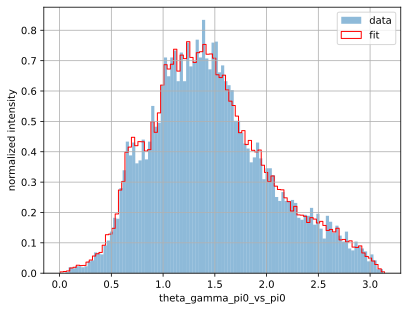

In [9]:
plot_1d_comparison('theta_2_4_vs_3')
plt.legend();

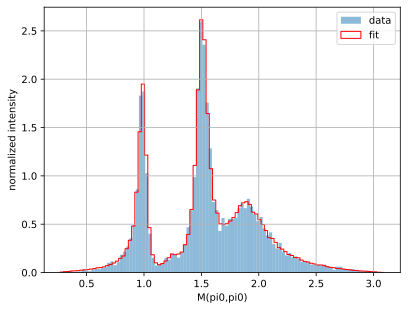

In [10]:
from numpy import sqrt

frame_data['M(3,4)'] = sqrt(frame_data['mSq_(3,4)'])
frame_phsp['M(3,4)'] = sqrt(frame_phsp['mSq_(3,4)'])

plot_1d_comparison('M(3,4)')
plt.legend();

### Dalitz plots

Dalitz plots are 2-dimensional histograms of the square values of the
invariant masses. We are therefore interested in the following variables:

In [11]:
variable_names = data_set.data.keys()
[var for var in variable_names if var.startswith('mSq_')]

['mSq_(2,4)', 'mSq_(3,4)', 'mSq_(2,3)', 'mSq_(2,3,4)']

In [12]:
def dalitz_plot(frame, mass_x, mass_y, bins=50, **kwargs):
    """Helper function to create a Dalitz plot with useful axis titles."""
    plt.hist2d(
        frame[mass_x],
        frame[mass_y],
        bins=bins,
        **kwargs)
    plt.xlabel(naming.replace_ids(mass_x, kinematics))
    plt.ylabel(naming.replace_ids(mass_y, kinematics))

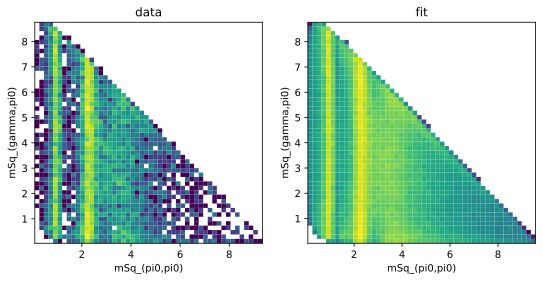

In [13]:
from matplotlib.colors import LogNorm  # logarithmic z-axis

fig, axs = plt.subplots(1, 2, figsize=(9, 4))

plt.sca(axs[0])
axs[0].set_title('data')
dalitz_plot(frame_data, 'mSq_(3,4)', 'mSq_(2,4)', norm=LogNorm())

plt.sca(axs[1])
axs[1].set_title('fit')
dalitz_plot(frame_phsp, 'mSq_(3,4)', 'mSq_(2,4)', norm=LogNorm(),
            weights=frame_phsp['weights'])

## 4.3 Calculate fit fractions

In [14]:
intensity_builder.get_all_component_names()

{'J/psi_-1_to_f0(1500)_0+gamma_-1;f0(1500)_0_to_pi0_0+pi0_0;': 'Amplitude',
 'J/psi_-1_to_f0(1500)_0+gamma_1;f0(1500)_0_to_pi0_0+pi0_0;': 'Amplitude',
 'J/psi_-1_to_f0(980)_0+gamma_-1;f0(980)_0_to_pi0_0+pi0_0;': 'Amplitude',
 'J/psi_-1_to_f0(980)_0+gamma_1;f0(980)_0_to_pi0_0+pi0_0;': 'Amplitude',
 'J/psi_-1_to_f2(1270)_-1+gamma_-1;f2(1270)_-1_to_pi0_0+pi0_0;': 'Amplitude',
 'J/psi_-1_to_f2(1270)_-2+gamma_-1;f2(1270)_-2_to_pi0_0+pi0_0;': 'Amplitude',
 'J/psi_-1_to_f2(1270)_0+gamma_-1;f2(1270)_0_to_pi0_0+pi0_0;': 'Amplitude',
 'J/psi_-1_to_f2(1270)_0+gamma_1;f2(1270)_0_to_pi0_0+pi0_0;': 'Amplitude',
 'J/psi_-1_to_f2(1270)_1+gamma_1;f2(1270)_1_to_pi0_0+pi0_0;': 'Amplitude',
 'J/psi_-1_to_f2(1270)_2+gamma_1;f2(1270)_2_to_pi0_0+pi0_0;': 'Amplitude',
 'J/psi_-1_to_f2(1950)_-1+gamma_-1;f2(1950)_-1_to_pi0_0+pi0_0;': 'Amplitude',
 'J/psi_-1_to_f2(1950)_-2+gamma_-1;f2(1950)_-2_to_pi0_0+pi0_0;': 'Amplitude',
 'J/psi_-1_to_f2(1950)_0+gamma_-1;f2(1950)_0_to_pi0_0+pi0_0;': 'Amplitude',
 'J/psi_-1_to

As you can see, these components are amplitudes and intensities that are
added coherently or incoherently.

In [15]:
components = intensity_builder.create_intensity_components([
    ['coherent_J/psi_-1_to_gamma_-1+pi0_0+pi0_0'],
    ['J/psi_-1_to_f2(1270)_-1+gamma_-1;f2(1270)_-1_to_pi0_0+pi0_0;'],
    ['J/psi_-1_to_f2(1270)_-2+gamma_-1;f2(1270)_-2_to_pi0_0+pi0_0;'],
    ['J/psi_-1_to_f2(1270)_0+gamma_-1;f2(1270)_0_to_pi0_0+pi0_0;'],
    [
        'J/psi_-1_to_f2(1270)_-1+gamma_-1;f2(1270)_-1_to_pi0_0+pi0_0;',
        'J/psi_-1_to_f2(1270)_-2+gamma_-1;f2(1270)_-2_to_pi0_0+pi0_0;',
        'J/psi_-1_to_f2(1270)_0+gamma_-1;f2(1270)_0_to_pi0_0+pi0_0;',
    ],
])

In [16]:
fit_fractions = pwa.fit_fractions_with_propagated_errors([
    (components[1], components[0]),
    (components[2], components[0]),
    (components[3], components[0]),
    (components[4], components[0]),
], phsp_set, fit_result)

In [17]:
for fraction in fit_fractions:
    print(fraction.name.replace(';', '\n  '))
    print(fraction.value, '+/-', fraction.error)
    print()

J/psi_-1_to_f2(1270)_-1+gamma_-1
  f2(1270)_-1_to_pi0_0+pi0_0
  /coherent_J/psi_-1_to_gamma_-1+pi0_0+pi0_0
0.005501850830255425 +/- 0.0022183906025873886

J/psi_-1_to_f2(1270)_-2+gamma_-1
  f2(1270)_-2_to_pi0_0+pi0_0
  /coherent_J/psi_-1_to_gamma_-1+pi0_0+pi0_0
0.012420672414582544 +/- 0.002653431595913076

J/psi_-1_to_f2(1270)_0+gamma_-1
  f2(1270)_0_to_pi0_0+pi0_0
  /coherent_J/psi_-1_to_gamma_-1+pi0_0+pi0_0
0.010391539894366328 +/- 0.0021906343885218682

J/psi_-1_to_f2(1270)_-1+gamma_-1
  f2(1270)_-1_to_pi0_0+pi0_0
  _J/psi_-1_to_f2(1270)_-2+gamma_-1
  f2(1270)_-2_to_pi0_0+pi0_0
  _J/psi_-1_to_f2(1270)_0+gamma_-1
  f2(1270)_0_to_pi0_0+pi0_0
  /coherent_J/psi_-1_to_gamma_-1+pi0_0+pi0_0
0.028241292333545154 +/- 0.0029959113671379936



And, please, feel free to
[provide feedback](https://github.com/ComPWA/pycompwa/issues/new)
or [contribute](https://compwa.github.io/contribute.html) ;)